## Observations and Insights 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import scipy.stats as st
from scipy.stats import linregress

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
mouse_study = pd.merge(mouse_metadata, study_results, how='left', on=['Mouse ID','Mouse ID'])
mouse_study.head()


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [2]:
# Checking the number of mice in the DataFrame.
mouse_count = mouse_study['Mouse ID'].nunique()
mouse_count

249

In [4]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
mouse_study2 = mouse_study.assign(
    is_duplicate= lambda d: d.duplicated(
    )).sort_values(['Mouse ID','Timepoint']).reset_index(drop=True) 
mouse_study2

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites,is_duplicate
0,a203,Infubinol,Female,20,23,0,45.000000,0,False
1,a203,Infubinol,Female,20,23,5,48.508468,0,False
2,a203,Infubinol,Female,20,23,10,51.852437,1,False
3,a203,Infubinol,Female,20,23,15,52.777870,1,False
4,a203,Infubinol,Female,20,23,20,55.173336,1,False
...,...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2,False
1889,z969,Naftisol,Male,9,30,30,65.841013,3,False
1890,z969,Naftisol,Male,9,30,35,69.176246,4,False
1891,z969,Naftisol,Male,9,30,40,70.314904,4,False


In [5]:
# Optional: Get all the data for the duplicate mouse ID. 
mouse_study[mouse_study.duplicated()]

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
909,g989,Propriva,Female,21,26,0,45.0,0


In [6]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
mouse_df = mouse_study.drop_duplicates()
mouse_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [7]:
# Checking the number of mice in the clean DataFrame.
mice = mouse_df['Mouse ID'].nunique()
print(f'There are {mice} mice.')

There are 249 mice.


## Summary Statistics

In [8]:
# Generate a summary statistics table of mean, median, variance, 
#standard deviation, and SEM of the tumor volume for each regimen
regimen_gb = mouse_df.groupby(['Drug Regimen'])

tumor_mean = regimen_gb['Tumor Volume (mm3)'].mean()
tumor_med = regimen_gb['Tumor Volume (mm3)'].median()
tumor_var = regimen_gb['Tumor Volume (mm3)'].var()
tumor_std = regimen_gb['Tumor Volume (mm3)'].std()
tumor_sem = regimen_gb['Tumor Volume (mm3)'].sem()

mouse_study_df = pd.DataFrame({
                        'Mean': tumor_mean,
                        'Median': tumor_med,
                        'Variance': tumor_var,
                        'Std Dev': tumor_std,
                        'SEM': tumor_sem
                               })
mouse_study_df.style.format("{:,.2f}")
mouse_study_df= mouse_study_df.reset_index()
mouse_study_df




# This method is the most straighforward, creating multiple series and putting them all together at the end.

,Drug Regimen,Mean,Median,Variance,Std Dev,SEM
0,Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
1,Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
2,Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
3,Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
4,Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
5,Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
6,Propriva,52.368318,50.909965,42.278090,6.502160,0.514041
7,Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
8,Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111
9,Zoniferol,53.236507,51.818479,48.533355,6.966589,0.516398


## Bar Plots

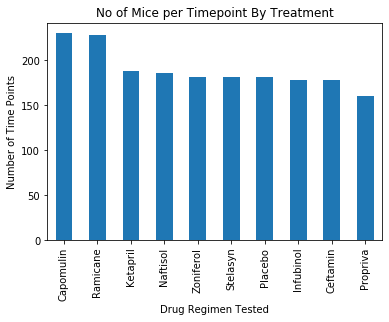

<Figure size 432x288 with 0 Axes>

In [54]:
# Generate a bar plot showing the number of mice per time point for each 
#treatment throughout the course of the study using pandas. 

plt.figure()
bar_plot = regimen_gb.size().sort_values(ascending=False).plot.bar(title='No of Mice per Timepoint By Treatment')
xtickangle=45
bar_plot.set_xlabel("Drug Regimen Tested")
bar_plot.set_ylabel("Number of Time Points")
plt.show()
plt.tight_layout()



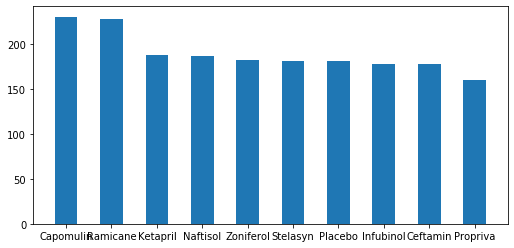

In [66]:
# Generate a bar plot showing the number of mice per time point for each 
#treatment throughout the course of the study using pyplot.
plt.figure(figsize=(8.5,4))
axis = mouse_df.groupby(['Drug Regimen']).size().sort_values(ascending=False)
drug_list = axis.index[0:10]
drug_data = np.arange(len(drug_list))
plt.bar(drug_data, axis, align='center', width=0.5, tick_label=drug_list)
plt.xticks= (drug_data,(drug_list))
plt.show()




## Pie Plots

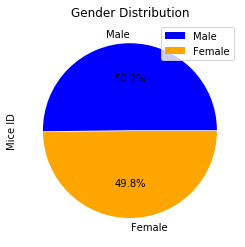

In [67]:
# Generate a pie plot showing the distribution of female versus male mice using pandas

by_sex = mouse_df.groupby(['Sex'])
mice_values = by_sex['Mouse ID'].nunique()
sex_df = pd.DataFrame({'Mice ID': mice_values,},index=['Male','Female'])

sex_labels = ['Male', 'Female']
colors = ["blue", "orange"]
explode = (0.01, 0)

sex_df.plot(y='Mice ID',kind='pie',title='Gender Distribution',
            autopct='%1.1f%%', colors=colors,explode=explode)

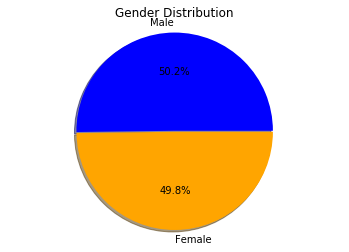

In [68]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot

mice_val = mouse_df.drop_duplicates('Mouse ID')
mice_val2 = mice_val['Sex'].value_counts()
plt.figure()
labels_py=['Male','Female']
pyplot_pie = plt.pie(mice_val2, explode=explode, labels=labels_py, autopct='%1.1f%%',
        shadow=True,colors=colors)
plt.axis('equal')
plt.title('Gender Distribution')
plt.show()

## Quartiles, Outliers and Boxplots

In [69]:
# Calculate the final tumor volume of each mouse across four of the 
#most promising treatment regimens. Calculate the IQR and quantitatively 
#determine if there are any potential outliers. 

mouse_df = mouse_df.sort_values(by = 'Tumor Volume (mm3)', ascending=True)
mouse_df2 = mouse_df[['Mouse ID','Drug Regimen','Timepoint','Tumor Volume (mm3)']]
test = mouse_df2.groupby(['Mouse ID']).max()
test=test.reset_index()
#test
test_mrg=test[['Mouse ID','Timepoint']].merge(mouse_df2,on=['Mouse ID','Timepoint'],how='left')
test_mrg

,Mouse ID,Timepoint,Drug Regimen,Tumor Volume (mm3)
0,a203,45,Infubinol,67.973419
1,a251,45,Infubinol,65.525743
2,a262,45,Placebo,70.717621
3,a275,45,Ceftamin,62.999356
4,a366,30,Stelasyn,63.440686
...,...,...,...,...
244,z435,10,Propriva,48.710661
245,z578,45,Ramicane,30.638696
246,z581,45,Infubinol,62.754451
247,z795,45,Naftisol,65.741070


In [70]:
cap_test = test_mrg.loc[(test_mrg['Drug Regimen'] == 'Capomulin')]
cap_test.head()

quartiles = cap_test['Tumor Volume (mm3)'].quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq

print(f"Capomulin Test:")
print(f"The lower quartile for is: {lowerq}")
print(f"The upper quartile is: {upperq}")
print(f"The interquartile range is: {iqr}")
print(f"The the median is: {quartiles[0.5]}")

Capomulin Test:
The lower quartile for is: 32.37735684
The upper quartile is: 40.1592203
The interquartile range is: 7.781863460000004
The the median is: 38.125164399999996


In [71]:
ram_test = test_mrg.loc[(test_mrg['Drug Regimen'] == 'Ramicane')]
ram_test.head()
quartiles = ram_test['Tumor Volume (mm3)'].quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq

print(f"Ramicane Test:")
print(f"The lower quartile is: {lowerq}")
print(f"The upper quartile is: {upperq}")
print(f"The interquartile range is: {iqr}")
print(f"The the median is: {quartiles[0.5]}")

Ramicane Test:
The lower quartile is: 31.56046955
The upper quartile is: 40.65900627
The interquartile range is: 9.098536719999998
The the median is: 36.56165229


In [72]:
ket_test = test_mrg.loc[(test_mrg['Drug Regimen'] == 'Ketapril')]
ket_test.head()

quartiles = ket_test['Tumor Volume (mm3)'].quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq

print(f"Ketapril Test:")
print(f"The lower quartile is: {lowerq}")
print(f"The upper quartile is: {upperq}")
print(f"The interquartile range is: {iqr}")
print(f"The the median is: {quartiles[0.5]}")

Ketapril Test:
The lower quartile is: 56.72009545
The upper quartile is: 69.87225079
The interquartile range is: 13.152155339999993
The the median is: 64.48781246


In [73]:

naf_test = test_mrg.loc[(test_mrg['Drug Regimen'] == 'Naftisol')]
naf_test.head()
quartiles = naf_test['Tumor Volume (mm3)'].quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq

print(f"Naftisol Test:")
print(f"The lower quartile is: {lowerq}")
print(f"The upper quartile is: {upperq}")
print(f"The interquartile range is: {iqr}")
print(f"The the median is: {quartiles[0.5]}")

Naftisol Test:
The lower quartile is: 52.07951009
The upper quartile is: 69.56362076
The interquartile range is: 17.484110670000007
The the median is: 63.28328821


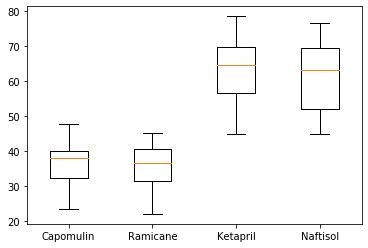

In [74]:
# Generate a box plot of the final tumor volume of each mouse across four 
#regimens of interest
plt.figure()
plt.boxplot([cap_test['Tumor Volume (mm3)'], 
             ram_test['Tumor Volume (mm3)'],
             ket_test['Tumor Volume (mm3)'],
             naf_test['Tumor Volume (mm3)']],
            labels=['Capomulin','Ramicane','Ketapril','Naftisol'])
plt.show()


## Line and Scatter Plots

/Users/jorgezecena/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:10: UserWarning: The handle <matplotlib.lines.Line2D object at 0x1a214d46d0> has a label of '_line0' which cannot be automatically added to the legend.
  # Remove the CWD from sys.path while we load stuff.


Text(0.5, 1.0, 'Capomulin treatment of mouse I509')

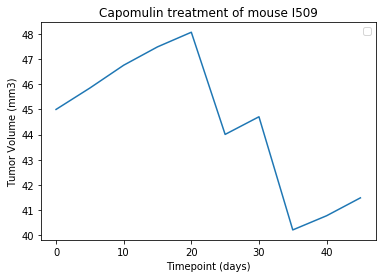

In [75]:
# Generate a line plot of time point versus tumor volume for a 
#mouse treated with Capomulin
plt.figure()
mouse_df2 = mouse_df2.sort_values(by=['Timepoint'])
mouse_line = mouse_df2.loc[(mouse_df2['Mouse ID'] == 'l509') & (mouse_df2['Drug Regimen'] == 'Capomulin')]
mouse_line
x_axis = np.arange(0,50,5)
y_axis = mouse_line['Tumor Volume (mm3)']
mouse_line_chart, = plt.plot(x_axis, y_axis)
plt.legend(handles=[mouse_line_chart], loc="best")
plt.xlabel("Timepoint (days)")
plt.ylabel("Tumor Volume (mm3)")
plt.title('Capomulin treatment of mouse I509')





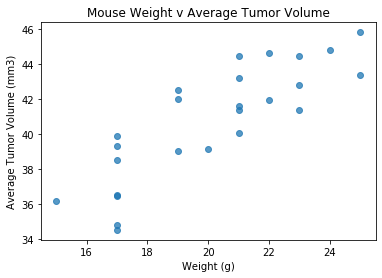

<Figure size 432x288 with 0 Axes>

In [79]:
# Generate a scatter plot of mouse weight versus average tumor 
#volume for the Capomulin regimen
rng = np.random.RandomState(0)
m_scatter = mouse_df.loc[(mouse_df['Drug Regimen'] == 'Capomulin')]
ave_tumor = m_scatter.groupby('Mouse ID')['Tumor Volume (mm3)'].mean().to_frame()
m_weights = m_scatter[['Mouse ID','Weight (g)']]
scatter_merge =  ave_tumor.merge(m_weights,on=['Mouse ID'],how='inner')
scatter_fin = scatter_merge.drop_duplicates()

fig, ax1 = plt.subplots()
ax1.set_ylabel('Average Tumor Volume (mm3)')
ax1.set_xlabel('Weight (g)')

plt.scatter(scatter_fin['Weight (g)'], scatter_fin['Tumor Volume (mm3)'], alpha=0.75,
            cmap='viridis')
plt.title('Mouse Weight v Average Tumor Volume')
plt.show()
plt.tight_layout()


## Correlation and Regression

In [17]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen


The correlation between both factors is 0.84
The r-squared is: 0.708856804770873


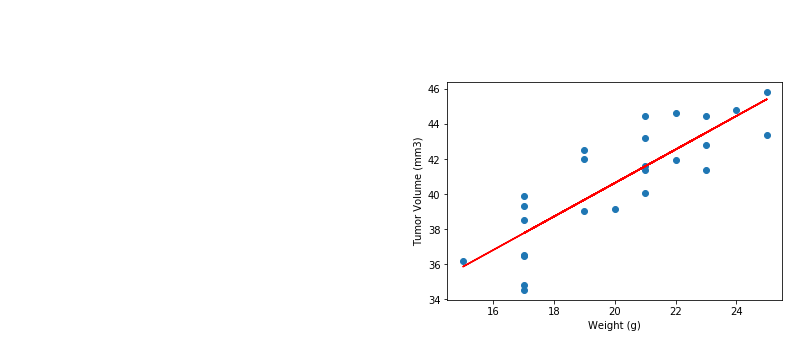

In [80]:
weight = scatter_fin.iloc[:,2]
ave_tumor_size = scatter_fin.iloc[:,1]
corr = st.pearsonr(weight,ave_tumor_size)
print(f"The correlation between both factors is {round(corr[0],2)}")
x_val = scatter_fin['Weight (g)']
y_val = scatter_fin['Tumor Volume (mm3)']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_val, y_val)
regress_values = x_val * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_val,y_val)
plt.plot(x_val,regress_values,"r-")
plt.annotate(line_eq,(0,50),fontsize=15,color="red")
plt.xlabel('Weight (g)')
plt.ylabel('Tumor Volume (mm3)')
print(f"The r-squared is: {rvalue**2}")
plt.show()